### Устанавливаем необходимые зависимости

In [1]:
!pip install  pymorphy2 numpy nltk stop_words corus sklearn

     |████████████████████████████████| 51kB 1.8MB/s 
     |████████████████████████████████| 71kB 4.2MB/s 
     |████████████████████████████████| 7.1MB 18.1MB/s 
  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32916 sha256=0bbc289938a3267f1083518cd3d619656e694c17b0a6997823776fb35fc76bb3
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [0]:
import pymorphy2
import string
import nltk
import numpy as np
import matplotlib.pyplot as plt
import itertools
import string
from stop_words import get_stop_words
from corus import load_wiki
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pprint import pprint

### Загружаем список стоп-слов и пунктуационных знаков

In [33]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Считываем дамп Wikipedia, загруженный из корпуса https://github.com/natasha/corus


In [34]:
!wget https://dumps.wikimedia.org/ruwiki/latest/ruwiki-latest-pages-articles.xml.bz2

--2020-01-21 21:58:15--  https://dumps.wikimedia.org/ruwiki/latest/ruwiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844911574 (3.6G) [application/octet-stream]
Saving to: ‘ruwiki-latest-pages-articles.xml.bz2’

ruwiki-latest-pages 100%[===================>]   3.58G  4.99MB/s    in 12m 12s 

2020-01-21 22:10:28 (5.01 MB/s) - ‘ruwiki-latest-pages-articles.xml.bz2’ saved [3844911574/3844911574]



In [0]:
path = 'ruwiki-latest-pages-articles.xml.bz2'
records = load_wiki(path)

### Подготавливаем тексты из Wikipedia для TF-IDF

In [0]:
wiki_texts = []
for i in range(100):
    wiki_texts.append(next(records).text)

### Токенизируем текст, вычищая стоп-слова и производя лемматизацию

In [0]:
def tokenize_ru(file_text):
    # firstly let's apply nltk tokenization
    tokens = word_tokenize(file_text)

    # let's delete punctuation symbols
    tokens = [i for i in tokens if (i not in string.punctuation)]

    # deleting stop_words
    stop_words = stopwords.words('russian') + get_stop_words('ru')
    stop_words.extend(['в', '', '•', '—', '–', 'к', 'на', '№', '©', '►','3–4','1–2','2–3', '5–7', '15–20', '10-15', '20–25', '...', 'of', 'но', 'этот', 'наш', 'такой', 'если', 'г.'])
    tokens = [i for i in tokens if ((i not in stop_words) and (len(i)>1) and (not i.isnumeric()))]
    # cleaning words
    tokens = [i.replace("«", "").replace("»", "") for i in tokens]
    
    morph = pymorphy2.MorphAnalyzer()
    #stems=[]
    #for item in tokens:
    #   stems.append(SnowballStemmer("russian").stem(item))
    morphs = []
    for item in tokens:
        morphs.append(sorted(morph.parse(item), key=lambda p: p.score)[0].normal_form)
    
    return morphs

## TF IDF

In [0]:
def tf_idf(corpus, feature_count):
    corpus = [content]+wiki_texts
    stop_words = stopwords.words('russian') + get_stop_words('ru')
    vectorizer = TfidfVectorizer(tokenizer = tokenize_ru)
    X = vectorizer.fit_transform(corpus)
    features = np.array(vectorizer.get_feature_names())
    return features[(-X.toarray()[0]).argsort()[:feature_count]]

`features` - содержит термины из документа

In [6]:
from google.colab import files
uploaded = files.upload()

Saving 1.txt to 1.txt
Saving 2.txt to 2.txt
Saving 3.txt to 3.txt
Saving 4.txt to 4.txt
Saving 5.txt to 5.txt
Saving 6.txt to 6.txt
Saving 7.txt to 7.txt
Saving 8.txt to 8.txt
Saving fulltext.txt to fulltext.txt


In [39]:
for file in uploaded.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(name=file, length=len(uploaded[file])))

Uploaded file "1.txt" with length 477384 bytes
Uploaded file "2.txt" with length 502954 bytes
Uploaded file "3.txt" with length 662293 bytes
Uploaded file "4.txt" with length 726998 bytes
Uploaded file "5.txt" with length 638477 bytes
Uploaded file "6.txt" with length 311712 bytes
Uploaded file "7.txt" with length 240980 bytes
Uploaded file "8.txt" with length 383385 bytes
Uploaded file "fulltext.txt" with length 11674355 bytes


In [40]:
features_count = 10
# texts_count = 8
features_per_text = {}
# for i in range(texts_count):
#     print(f'parsing {i}.txt file')
print("Проведение TF-IDF анализа")
with open('fulltext.txt', 'r') as file:
    content = file.read().replace('\n', ' ')
#     features_per_text[i] = tf_idf(content, features_count)
    features = tf_idf(content, features_count)

Проведение TF-IDF анализа


In [41]:
print("Результат TF-IDF. Первые 10 результатов")
print(features)

Результат TF-IDF. Первые 10 результатов
['звезда' 'планет' 'эйнштейн' 'дыра' 'вселенная' 'нейтронный' 'солнце'
 'теория' 'телескоп' 'орбита']


## Подсчёт частоты вхождения

#### Считываем весь документ

In [25]:
print("Частотный анализ")
with open('fulltext.txt', 'r') as file:
         content = file.read().replace('\n', ' ')

Частотный анализ


#### Токенизируем текст

In [26]:
print("Токенизация текста")
tokens = tokenize_ru(content)

Токенизация текста


#### Подсчитываем частоту

In [12]:
print("Подсчёт частот")
freq_dist = nltk.FreqDist(w.lower() for w in tokens)

Подсчёт частот


#### Берём 1000 самых частых вхождений

In [13]:
print("Топ 10 результатов")
print(freq_dist.most_common(10))

Топ 10 результатов
[('звезда', 5328), ('планет', 3356), ('земля', 2956), ('но', 2260), ('теория', 2170), ('один', 2140), ('этот', 2076), ('эйнштейн', 2018), ('вселенная', 2014), ('система', 1943)]


### Гистограмма

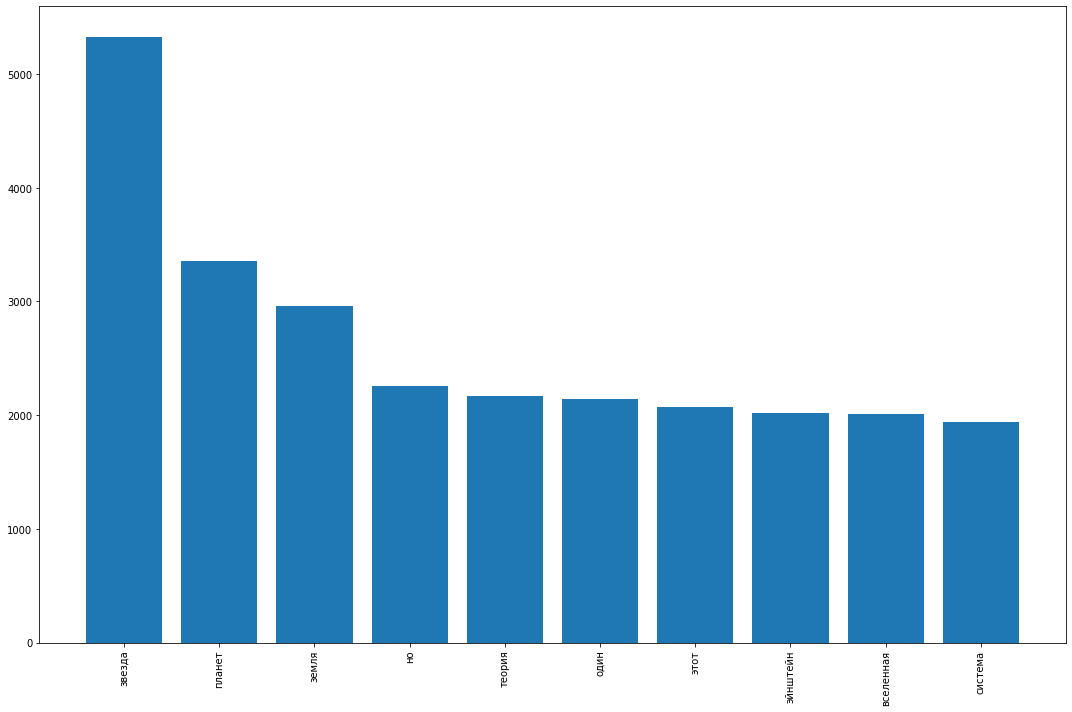

In [30]:
freq = freq_dist.most_common(10)

indices = np.arange(len(freq))
plt.figure(figsize=(15,10))
plt.bar(indices, list(map(lambda x: x[1], freq)))
plt.xticks(indices, list(map(lambda x: x[0], freq)), rotation='vertical')
plt.tight_layout()
plt.show()

## HAL Matrix

#### Считываем весь документ

In [15]:
print("Построение HAL матриц")
with open('fulltext.txt', 'r') as file:
         content = file.read().replace('\n', ' ')

Построение HAL матриц


#### Токенизируем и преобразуем в сет

In [16]:
print("Токенизируем весь текст")
tokens = list(set(tokenize_ru(content)))

Токенизируем весь текст


#### Берём окно, продвигаем его по всему тексту и для всех встреченных пар слов высчитываем расстояние

In [0]:
def hal_matrix(tokenized_text, all_tokens, frame_len=5):
    m_size =  len(all_tokens)
    hal = np.zeros([m_size, m_size])
    for t in range(len(tokenized_text)-frame_len):
        t_token = tokenized_text[t]
        for f_off in range(1, frame_len):
            off_token = tokenized_text[t+f_off]
            r = all_tokens.index(t_token)
            c = all_tokens.index(off_token)
            hal[r, c] += frame_len - f_off
#             hal[c, r] += frame_len - f_off
                
    return hal

#### Строим 8 HAL матриц для каждой темы документа и выбираем топ-10

In [18]:
texts_count = 8
results = dict()
for i in range(1, texts_count+1):
    print(f'Построение HAL матрицы для главы {i}')
    with open(f'{i}.txt', 'r') as file:
        content = file.read().replace('\n', ' ')
    tokenized_text = tokenize_ru(content)
    hal_tmp = hal_matrix(tokenized_text, tokens, 5)
    res = []
    for j in range(10):
        r, c = np.unravel_index(hal_tmp.argmax(), hal_tmp.shape)
        res.append(tokens[r] + ' '+ tokens[c])
        hal_tmp[(r,c)] = -1
    results[i] = res

Построение HAL матрицы для главы 1
Построение HAL матрицы для главы 2
Построение HAL матрицы для главы 3
Построение HAL матрицы для главы 4
Построение HAL матрицы для главы 5
Построение HAL матрицы для главы 6
Построение HAL матрицы для главы 7
Построение HAL матрицы для главы 8


In [31]:
print("Топ 10 словосочетаний для каждой главы")
pprint(results)
print(results)

Топ 10 словосочетаний для каждой главы
{1: ['теория относительность',
     'общий теория',
     'скорость света',
     'квантовый теория',
     'общий относительность',
     'теория струна',
     'принцип неопределённость',
     'объединить теория',
     'друг друг',
     'такой образ'],
 2: ['яркий звезда',
     'любитель астрономия',
     'звёздный небо',
     'главное зеркало',
     'адаптивный оптик',
     'имя звезда',
     'крупный телескоп',
     'солнечный система',
     'звезда созвездие',
     'система оптик'],
 3: ['солнечный система',
     'космический аппарат',
     'движение планет',
     'форма жизнь',
     'наш планет',
     'органический молекула',
     'солнечный света',
     'нуклеиновый кислота',
     'планет земля',
     'планет солнце'],
 4: ['теория относительность',
     'теория эйнштейн',
     'квантовый теория',
     'скорость света',
     'теория поль',
     'г. эйнштейн',
     'общий теория',
     'чёрный дыра',
     'такой образ',
     'единый теория'],
 5: